# Homework II

### Grupo 003

(ist1107028) Inês Paredes

(ist1107137) Margarida Lourenço


## II. Programming [7v]

Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using sklearn, apply a 5-fold stratiﬁed cross-validation with shuﬄing (random_state=0) for the
assessment of predictive models along this section.

**1) Compare the performance of a with and a naïve Bayes with Gaussian𝑘𝑁𝑁 𝑘 = 5
assumption (consider all remaining parameters as default):**

**a. [1.0v] Plot two boxplots with the fold accuracies for each classiﬁer. Is there one
more stable than the other regarding performance? Why do you think that is the
case? Explain.**

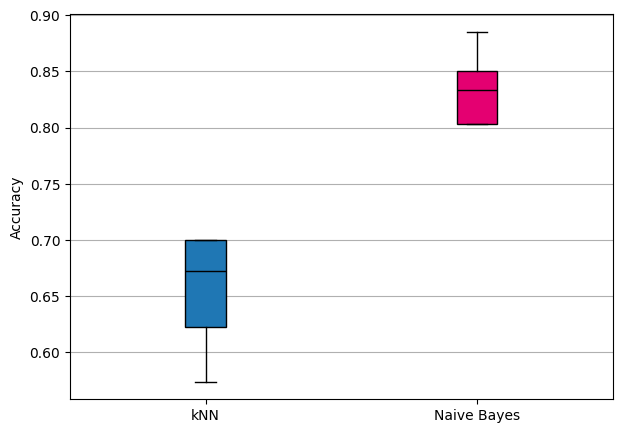

In [1]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Read the dataset
df = pd.read_csv("./heart-disease.csv")
X, y = df.drop("target", axis=1), df["target"]

# Define cross-validation strategy
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize classifiers
knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

# Evaluate classifiers
knn_accs = cross_val_score(knn_predictor, X, y, cv=folds, scoring="accuracy")
nb_accs = cross_val_score(nb_predictor, X, y, cv=folds, scoring="accuracy")

# Plot boxplots
plt.figure(figsize=(7, 5))
b_plot = plt.boxplot(
    [knn_accs, nb_accs], patch_artist=True, labels=["kNN", "Naive Bayes"]
)

colors = ["#1f77b4", "#E40071"]
for patch, color in zip(b_plot["boxes"], colors):
    patch.set_facecolor(color)
for median in b_plot["medians"]:
    median.set_color("black")

plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.show()


None of the models contain outliers, but, regarding performance, the naïve Bayes model apears to be more stable. We make this statment becouse, as we can see in the graph, its boxplot is narrower, which means that its accuracy values are clustered closely around the median, and it also has shorter whiskers, indicating more consistent performance and, therefore, better stability.

Possible reasons that explain why kNN performs better compared to the naïve Bayes model are:

- kNN is able to handle variable dependencies (naïve Bayes assumes that the features are conditionally independent given the class) and variables that are not normally distributed (naïve Bayes with Gaussian assumption assumes all variables follow this specific distribution)

- Naive Bayes can struggle to estimate probabilities accurately when there are too few data points, which may result in incorrect or even zero probabilities. Additionally, if the class distribution is imbalanced, it can lead to biased predictions because the prior probabilities used in the model's calculations may be skewed.

**b. [1.0v] Report the accuracy of both models, this time scaling the data with a
Min-Max scaler before training the models. Explain the impact that this
preprocessing step has on the performance of each model, providing an
explanation for the results.**

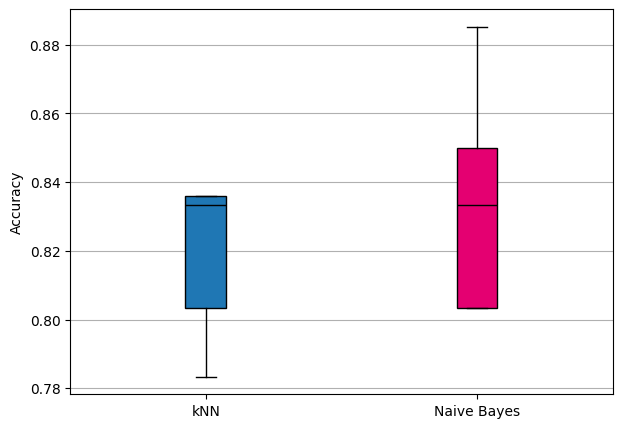

In [2]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Read the ARFF file and prepare data
df = pd.read_csv("./heart-disease.csv")
X, y = df.drop("target", axis=1), df["target"]

# Define cross-validation strategy
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create pipelines for scaling
knn_pipeline = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
nb_pipeline = Pipeline([("scaler", MinMaxScaler()), ("nb", GaussianNB())])

# Evaluate classifiers
knn_accs = cross_val_score(knn_pipeline, X, y, cv=folds, scoring="accuracy")
nb_accs = cross_val_score(nb_pipeline, X, y, cv=folds, scoring="accuracy")

# Plot boxplots
plt.figure(figsize=(7, 5))
b_plot = plt.boxplot(
    [knn_accs, nb_accs], patch_artist=True, labels=["kNN", "Naive Bayes"]
)

colors = ["#1f77b4", "#E40071"]
for patch, color in zip(b_plot["boxes"], colors):
    patch.set_facecolor(color)
for median in b_plot["medians"]:
    median.set_color("black")

plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.show()


This preprocessing step worsens the performances of both models. The possible reasons for this outcome is that scaling might make irrelevant features more prominent, reducing both models' effectiveness.

- For kNN, the Min-Max scaler alters the distances that the model relies on, which changes the neighbors that are considered "close", leading to incorret classifications.
Scaling makes all feature ranges the same, which can decrease the impact of features that were originally more significant, leading to worse performance

- For naïve Bayes, Min-Max scaling can distort the features, making them not normally distributed, which leads to inaccurate probability estimates.

**c. [1.0v] Using scipy, test the hypothesis “the model is statistically superior to 𝑘𝑁𝑁
naïve Bayes regarding accuracy”, asserting whether it is true.**

In [9]:
from scipy.stats import ttest_rel

res = ttest_rel(knn_accs, nb_accs, alternative="greater")
print("Is kNN > Naive Bayes? pval =", res.pvalue)

Is kNN > Naive Bayes? pval = 0.8259913182205001


Since the p-value (p-value = 0.83), is greater than the usual significance levels, (e.g., 𝛼 = 0.05), we cannot reject the null hypothesis, thus we can't afirm that the kNN model is statistically superior to naïve Bayes regarding accuracy.
In order to be able to make a correct statement about this hypothesis, it would be necessary to obtain more statistical tests.

**2) Using a 80-20 train-test split, vary the number of neighbors of a classiﬁer using𝑘𝑁𝑁
. Additionally, for each , train one classiﬁer using uniform weights𝑘 = {1, 5, 10, 20, 30} 𝑘
and distance weights.**

**a. [1.0v] Plot the train and test accuracy for each model.**

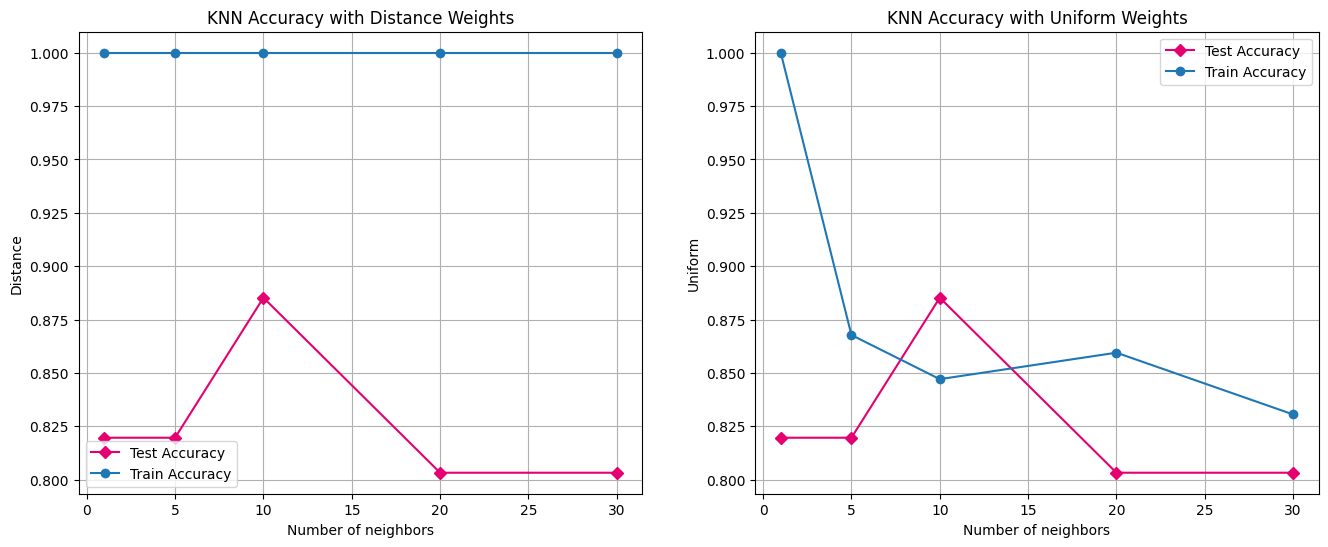

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the dataset
df = pd.read_csv("./heart-disease.csv")
X, y = df.drop("target", axis=1), df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

# Define different values of k
number_of_neighbors = [1, 5, 10, 20, 30]

# Initialize lists to store accuracy results
train_acc_uniform, test_acc_uniform = [], []
train_acc_distance, test_acc_distance = [], []

# Train and evaluate KNN with 'uniform' weights
for k in number_of_neighbors:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn_uniform.fit(X_train_scaled, y_train)
    train_acc_uniform.append(knn_uniform.score(X_train_scaled, y_train))
    test_acc_uniform.append(knn_uniform.score(X_test_scaled, y_test))

# Train and evaluate KNN with 'distance' weights
for k in number_of_neighbors:
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn_distance.fit(X_train_scaled, y_train)
    train_acc_distance.append(knn_distance.score(X_train_scaled, y_train))
    test_acc_distance.append(knn_distance.score(X_test_scaled, y_test))

# Plot the results
plt.figure(figsize=(16, 6))

# Plot distance accuracy
plt.subplot(1, 2, 1)
plt.plot(
    number_of_neighbors, 
    test_acc_distance, 
    label='Test Accuracy', 
    marker='D', 
    color='#E40071'
)

plt.plot(
    number_of_neighbors, 
    train_acc_distance, 
    label='Train Accuracy', 
    marker='o', 
    color='#1f77b4')

plt.xlabel('Number of neighbors')
plt.ylabel('Distance')
plt.title('KNN Accuracy with Distance Weights')
plt.grid(True)
plt.legend()

# Plot uniform accuracy
plt.subplot(1, 2, 2)
plt.plot(
    number_of_neighbors, 
    test_acc_uniform, 
    label='Test Accuracy', 
    marker='D', 
    color='#E40071'
)

plt.plot(
    number_of_neighbors, 
    train_acc_uniform, 
    label='Train Accuracy', 
    marker='o', 
    color='#1f77b4'
)

# Add labels and title
plt.xlabel('Number of neighbors')
plt.ylabel('Uniform')
plt.title('KNN Accuracy with Uniform Weights')
plt.grid(True)
plt.legend()
plt.show()


**b. [1.5v] Explain the impact of increasing the neighbors on the generalization ability of
the models.**

As the number of neighbors (k) increases, both models experience a shift in generalization ability. With uniform weights, as k increases, the model smooths its decision boundaries, reducing training accuracy and improving generalization until it peaks at k = 10. Beyond that, both training and test accuracy drop, indicating underfitting.

In the case of distance weights, the model maintains perfect training accuracy across all k, suggesting overfitting persists due to the emphasis on closer neighbors. However, the test accuracy also peaks at k = 10, similar to uniform weights. After this, increasing k causes underfitting in both models, as they fail to generalize well to the test data. In short, k = 10 is optimal, and larger k values lead to a loss of model generalization in both cases.



**3) [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two
possible diﬃculties of the naïve Bayes model used in the previous exercises when learning
from the given dataset.**

Two possible difficulties are:

- Naïve Bayes assumes class conditional independence, which can lead to a loss of accuracy and the unrealistic assumption of independence between features, such as age and cholesterol. The presence of a heart disease may be more strongly correlated with certain features than others, which would not be captured by the model.

- The model assumes that all features follow a specific distribution, which may not accurately reflect the dataset's true distribution, which would lead to inaccurate probability estimates and incorrect classifications.